# Basic CNN

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
os.listdir("/kaggle/input/uta-rldd")

In [ ]:
# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'


In [4]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

In [ ]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # optional dropout layer for regularization
model.add(layers.Dense(1, activation='sigmoid'))  # binary classification

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_generator, epochs=epochs, validation_data=test_generator)

In [ ]:
# Save the trained model
model.save('27_11_2023_(10_57)_drowsiness_detection_basicCNN.keras')

# MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers, models

In [ ]:
import os
os.getcwd()

In [5]:
# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

In [ ]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 10

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Save the trained model
# model.save('drowsiness_detection_mobilenetv2.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Save the trained model
# model.save('drowsiness_detection_mobilenetv2.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Save the trained model
# model.save('drowsiness_detection_mobilenetv2.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('drowsiness_detection_mobilenetv2.h5')

# Xception

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
83683744/83683744 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 20863529 (79.59 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
Epoch 1/10
34/34 [====

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


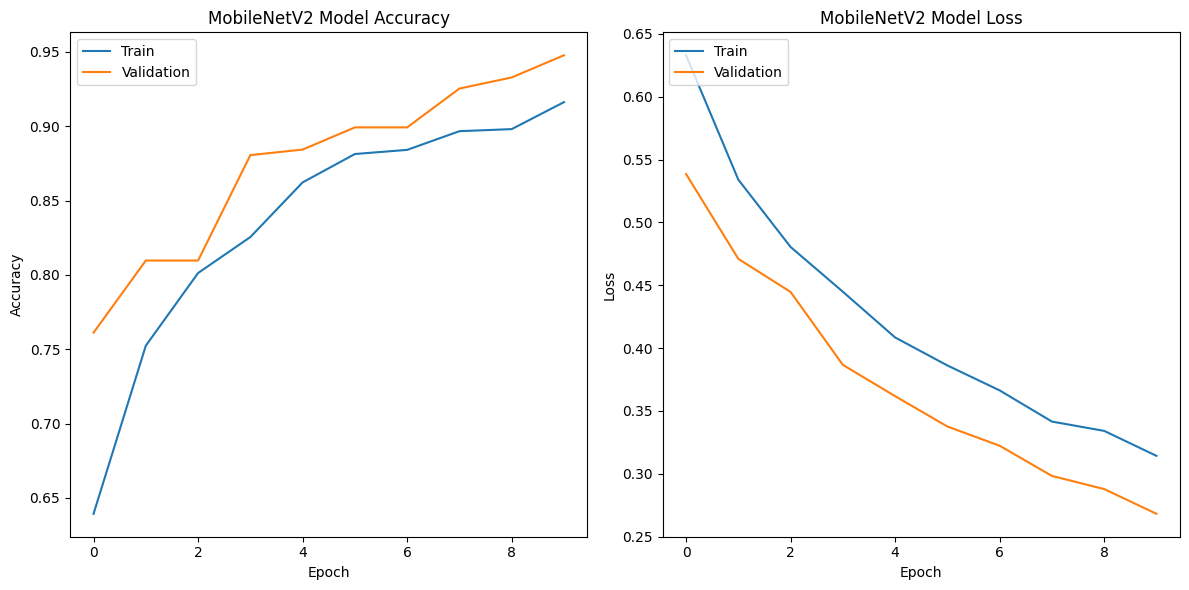

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.src.applications.xception import Xception
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 10

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Save the trained model
model.save('drowsiness_detection_xception.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20863529 (79.59 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
Epoch 1/15
34/34 [==============================] - 43s 1s/step - loss: 0.6277 - accu

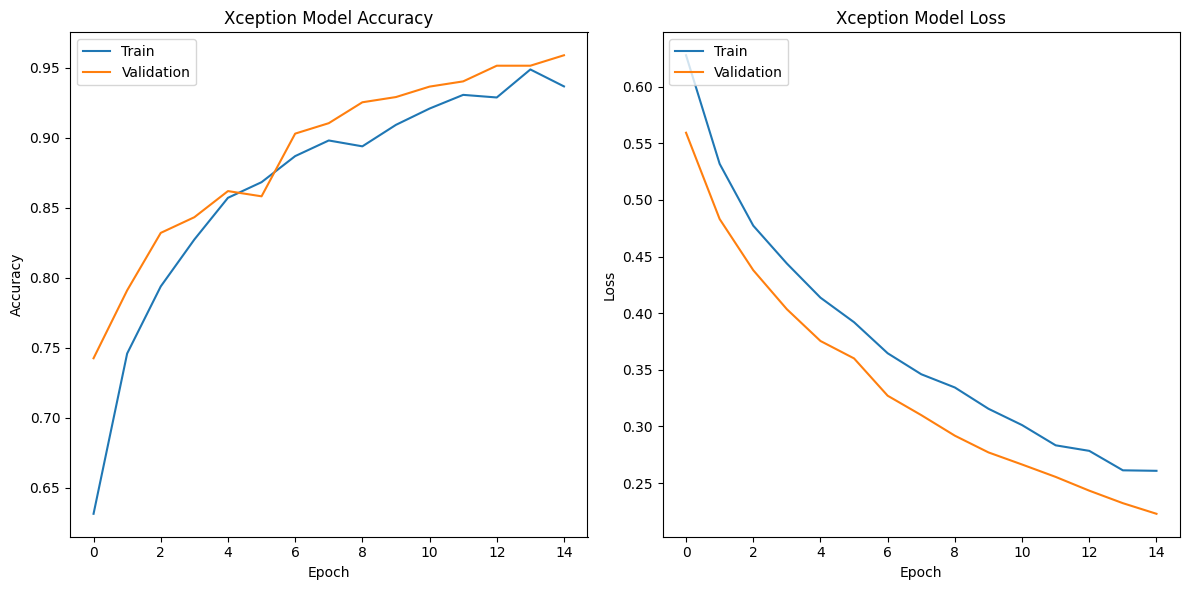

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.src.applications.xception import Xception
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Save the trained model
model.save('drowsiness_detection_xception1.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20863529 (79.59 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
Epoch 1/20
34/34 [==============================] - 43s 1s/step - loss: 0.6180 - accu

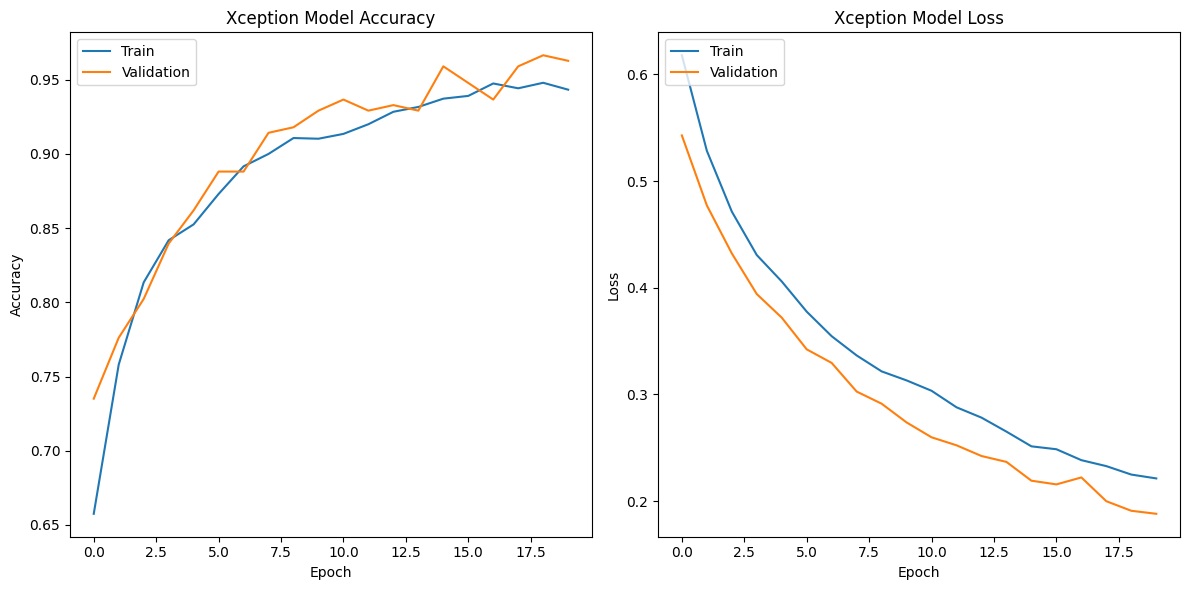

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.src.applications.xception import Xception
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 20

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Save the trained model
model.save('drowsiness_detection_xception1.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Xception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Efficient Net

In [10]:
from keras.applications.efficientnet_v2 import EfficientNetV2B1
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 5

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B1(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 6932405 (26.45 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________
Epoch 1/5


2023-11-29 19:15:24.556393: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetv2-b1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 55s 1s/step - loss: 0.6928 - accuracy: 0.5240 - val_loss: 0.6913 - val_accuracy: 0.5336
Epoch 2/5
34/34 [==============================] - 39s 1s/step - loss: 0.6930 - accuracy: 0.5323 - val_loss: 0.6912 - val_accuracy: 0.5336
Epoch 3/5
34/34 [==============================] - 39s 1s/step - loss: 0.6924 - accuracy: 0.5249 - val_loss: 0.6914 - val_accuracy: 0.5336
Epoch 4/5
34/34 [==============================] - 40s 1s/step - loss: 0.6921 - accuracy: 0.5323 - val_loss: 0.6914 - val_accuracy: 0.5336
Epoch 5/5
34/34 [==============================] - 40s 1s/step - loss: 0.6924 - accuracy: 0.5235 - val_loss: 0.6909 - val_accuracy: 0.5336


In [13]:
from keras.applications.efficientnet_v2 import EfficientNetV2B2
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 5

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Functio  (None, 7, 7, 1408)        8769374   
 nal)                                                            
                                                                 
 global_average_pooling2d_4  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 1)                 1409      
                                                                 
Total params: 8770783 (33.46 MB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 8769374 (33.45 MB)
_________________________________________________________________
Epoch 1/5


2023-11-29 19:26:13.620686: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/efficientnetv2-b2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 52s 1s/step - loss: 0.6897 - accuracy: 0.5356 - val_loss: 0.6891 - val_accuracy: 0.5336
Epoch 2/5
34/34 [==============================] - 39s 1s/step - loss: 0.6921 - accuracy: 0.5337 - val_loss: 0.6889 - val_accuracy: 0.5336
Epoch 3/5
34/34 [==============================] - 39s 1s/step - loss: 0.6933 - accuracy: 0.5272 - val_loss: 0.6886 - val_accuracy: 0.5336
Epoch 4/5
34/34 [==============================] - 39s 1s/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6887 - val_accuracy: 0.5336
Epoch 5/5
34/34 [==============================] - 41s 1s/step - loss: 0.6906 - accuracy: 0.5365 - val_loss: 0.6885 - val_accuracy: 0.5336


In [15]:
from keras.applications.efficientnet_v2 import EfficientNetV2B3
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 5

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
52606240/52606240 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b3 (Functio  (None, 7, 7, 1536)        12930622  
 nal)                                                            
                                                                 
 global_average_pooling2d_6  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 1)                 1537      
                                                                 
Total params: 12932159 (49.33 MB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 12930622 (49.33 MB)
____________________

2023-11-29 19:33:41.051721: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/efficientnetv2-b3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 53s 1s/step - loss: 0.6927 - accuracy: 0.5328 - val_loss: 0.6924 - val_accuracy: 0.5336
Epoch 2/5
34/34 [==============================] - 40s 1s/step - loss: 0.6924 - accuracy: 0.5286 - val_loss: 0.6923 - val_accuracy: 0.5336
Epoch 3/5
34/34 [==============================] - 40s 1s/step - loss: 0.6920 - accuracy: 0.5263 - val_loss: 0.6945 - val_accuracy: 0.5336
Epoch 4/5
34/34 [==============================] - 40s 1s/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.6920 - val_accuracy: 0.5336
Epoch 5/5
34/34 [==============================] - 40s 1s/step - loss: 0.6925 - accuracy: 0.5179 - val_loss: 0.6934 - val_accuracy: 0.5336


In [30]:
from keras.applications.efficientnet_v2 import EfficientNetV2S
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 7, 7, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 9 (GlobalAveragePooling2D)                                      
                                                                 
 dense_19 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 20332641 (77.56 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 20331360 (77.56 MB)
_________________________________________________________________
Epoch 1/15


2023-11-29 21:27:31.022504: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_19/efficientnetv2-s/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 58s 1s/step - loss: 0.6963 - accuracy: 0.5198 - val_loss: 0.6905 - val_accuracy: 0.5410
Epoch 2/15
34/34 [==============================] - 40s 1s/step - loss: 0.6911 - accuracy: 0.5337 - val_loss: 0.6857 - val_accuracy: 0.5299
Epoch 3/15
34/34 [==============================] - 41s 1s/step - loss: 0.6898 - accuracy: 0.5342 - val_loss: 0.6814 - val_accuracy: 0.5373
Epoch 4/15
34/34 [==============================] - 41s 1s/step - loss: 0.6879 - accuracy: 0.5407 - val_loss: 0.6776 - val_accuracy: 0.5597
Epoch 5/15
34/34 [==============================] - 40s 1s/step - loss: 0.6848 - accuracy: 0.5547 - val_loss: 0.6745 - val_accuracy: 0.6231
Epoch 6/15
34/34 [==============================] - 41s 1s/step - loss: 0.6817 - accuracy: 0.5738 - val_loss: 0.6715 - val_accuracy: 0.6343
Epoch 7/15
34/34 [==============================] - 40s 1s/step - loss: 0.6800 - accuracy: 0.5793 - val_loss: 0.6689 - val_accuracy: 0.6343
Epoch 8/15
34/34 [=============

In [17]:
from keras.applications import EfficientNetB0
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 5

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_7  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4050852 (15.45 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 4049571 (15.45 MB)
______________________

2023-11-29 19:56:10.015236: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 50s 1s/step - loss: 0.6953 - accuracy: 0.5044 - val_loss: 0.6913 - val_accuracy: 0.5336
Epoch 2/5
34/34 [==============================] - 39s 1s/step - loss: 0.6921 - accuracy: 0.5323 - val_loss: 0.6911 - val_accuracy: 0.5336
Epoch 3/5
34/34 [==============================] - 39s 1s/step - loss: 0.6918 - accuracy: 0.5347 - val_loss: 0.6912 - val_accuracy: 0.5336
Epoch 4/5
34/34 [==============================] - 40s 1s/step - loss: 0.6911 - accuracy: 0.5286 - val_loss: 0.6918 - val_accuracy: 0.5336
Epoch 5/5
34/34 [==============================] - 39s 1s/step - loss: 0.6920 - accuracy: 0.5347 - val_loss: 0.6911 - val_accuracy: 0.5336


In [19]:
from keras.applications import EfficientNetB1
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 5

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 7, 7, 1280)        6575239   
 )                                                               
                                                                 
 global_average_pooling2d_9  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 6576520 (25.09 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 6575239 (25.08 MB)
_________________________________________________________________
Epoch 1/5


2023-11-29 20:03:18.402981: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_9/efficientnetb1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 53s 1s/step - loss: 0.6950 - accuracy: 0.4993 - val_loss: 0.6922 - val_accuracy: 0.5336
Epoch 2/5
34/34 [==============================] - 40s 1s/step - loss: 0.6936 - accuracy: 0.5347 - val_loss: 0.6924 - val_accuracy: 0.5336
Epoch 3/5
34/34 [==============================] - 40s 1s/step - loss: 0.6924 - accuracy: 0.5351 - val_loss: 0.6922 - val_accuracy: 0.5336
Epoch 4/5
34/34 [==============================] - 39s 1s/step - loss: 0.6932 - accuracy: 0.5305 - val_loss: 0.6921 - val_accuracy: 0.5336
Epoch 5/5
34/34 [==============================] - 39s 1s/step - loss: 0.6931 - accuracy: 0.5337 - val_loss: 0.6920 - val_accuracy: 0.5336


In [20]:
from keras.applications import EfficientNetB2
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 5

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
31790344/31790344 [==============================] - 0s 0us/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1408)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_10 (Dense)            (None, 1)                 1409      
                                                                 
Total params: 7769978 (29.64 MB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 7768569 (29.63 MB)
_____________________

2023-11-29 20:06:53.327577: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/efficientnetb2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 53s 1s/step - loss: 0.6925 - accuracy: 0.5342 - val_loss: 0.6917 - val_accuracy: 0.5336
Epoch 2/5
34/34 [==============================] - 39s 1s/step - loss: 0.6919 - accuracy: 0.5333 - val_loss: 0.6917 - val_accuracy: 0.5336
Epoch 3/5
34/34 [==============================] - 39s 1s/step - loss: 0.6914 - accuracy: 0.5347 - val_loss: 0.6924 - val_accuracy: 0.5336
Epoch 4/5
34/34 [==============================] - 39s 1s/step - loss: 0.6919 - accuracy: 0.5333 - val_loss: 0.6915 - val_accuracy: 0.5336
Epoch 5/5
34/34 [==============================] - 38s 1s/step - loss: 0.6923 - accuracy: 0.5342 - val_loss: 0.6914 - val_accuracy: 0.5336


In [21]:
from keras.applications import EfficientNetB3
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 5

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
 1 (GlobalAveragePooling2D)                                      
                                                                 
 dense_11 (Dense)            (None, 1)                 1537      
                                                                 
Total params: 10785072 (41.14 MB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 10783535 (41.14 MB)
___________________

2023-11-29 20:10:30.752405: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 52s 1s/step - loss: 0.6914 - accuracy: 0.5240 - val_loss: 0.6930 - val_accuracy: 0.5336
Epoch 2/5
34/34 [==============================] - 39s 1s/step - loss: 0.6919 - accuracy: 0.5342 - val_loss: 0.6906 - val_accuracy: 0.5336
Epoch 3/5
34/34 [==============================] - 39s 1s/step - loss: 0.6929 - accuracy: 0.5342 - val_loss: 0.6903 - val_accuracy: 0.5336
Epoch 4/5
34/34 [==============================] - 39s 1s/step - loss: 0.6908 - accuracy: 0.5356 - val_loss: 0.6917 - val_accuracy: 0.5746
Epoch 5/5
34/34 [==============================] - 39s 1s/step - loss: 0.6920 - accuracy: 0.5389 - val_loss: 0.6897 - val_accuracy: 0.5336


In [22]:
from keras.applications import EfficientNetB4
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 5

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
71686520/71686520 [==============================] - 0s 0us/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 7, 7, 1792)        17673823  
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1792)              0         
 2 (GlobalAveragePooling2D)                                      
                                                                 
 dense_12 (Dense)            (None, 1)                 1793      
                                                                 
Total params: 17675616 (67.43 MB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 17673823 (67.42 MB)
___________________

2023-11-29 20:14:09.866796: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/efficientnetb4/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


34/34 [==============================] - 57s 1s/step - loss: 0.6919 - accuracy: 0.5230 - val_loss: 0.6902 - val_accuracy: 0.5336
Epoch 2/5
34/34 [==============================] - 39s 1s/step - loss: 0.6914 - accuracy: 0.5361 - val_loss: 0.6898 - val_accuracy: 0.5336
Epoch 3/5
34/34 [==============================] - 39s 1s/step - loss: 0.6906 - accuracy: 0.5333 - val_loss: 0.6895 - val_accuracy: 0.5336
Epoch 4/5
34/34 [==============================] - 40s 1s/step - loss: 0.6909 - accuracy: 0.5347 - val_loss: 0.6896 - val_accuracy: 0.5336
Epoch 5/5
34/34 [==============================] - 39s 1s/step - loss: 0.6906 - accuracy: 0.5356 - val_loss: 0.6894 - val_accuracy: 0.5336


# ResNet

In [27]:
from keras.applications.resnet import ResNet101
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 6 (GlobalAveragePooling2D)                                      
                                                                 
 dense_16 (Dense)            (None, 1)                 2049      
                                                                 
Total params: 42660225 (162.74 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 42658176 (162.73 MB)
_________________________________________________________________
Epoch 1/15
34/34 [==============================] - 48s 1s/step - loss: 0.6899 - a

In [26]:
from keras.applications.resnet import ResNet152
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = '/kaggle/input/uta-rldd/train'
test_data_dir = '/kaggle/input/uta-rldd/test'
val_data_dir = '/kaggle/input/uta-rldd/val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dense_15 (Dense)            (None, 1)                 2049      
                                                                 
Total params: 58372993 (222.68 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________
Epoch 1/15
34/34 [==============================] - 53s 1s/step - loss: 0.7009 - a